# BÀI THỰC HÀNH TUẦN 10: THUẬT TOÁN PHÂN CỤM K-MEANS VÀ DBSCAN

**Họ và tên:** Bùi Quang Chiến

**Môn học:** Học Máy - MAT3533

**Nội dung:**
- Phần 1: Thuật toán K-Means Clustering
  - Xây dựng từ numpy
  - Sử dụng scikit-learn
  - Áp dụng cho bộ dữ liệu chữ số viết tay MNIST
- Phần 2: Thuật toán DBSCAN

## PHẦN 1: THUẬT TOÁN K-MEANS CLUSTERING

### 1.1. Xây dựng chương trình từ numpy

#### Ví dụ 1: Phân cụm dữ liệu nhân tạo với 3 cụm

In [32]:
# Gọi các thư viện cần thiết
# Ta tự xây dựng phần k-means nên sẽ không gọi sklearn

from __future__ import print_function  
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist 
np.random.seed(11)

In [33]:
# Kỳ vọng và hiệp phương sai của 3 cụm dữ liệu
means = [[2, 2], [8, 3], [3, 6]] 
cov = [[1, 0], [0, 1]] 

# Số điểm mỗi cụm dữ liệu
N = 500 

# Tạo các cụm dữ liệu qua phân bố chuẩn (Gaussian)
X0 = np.random.multivariate_normal(means[0], cov, N) 
X1 = np.random.multivariate_normal(means[1], cov, N) 
X2 = np.random.multivariate_normal(means[2], cov, N) 

# Tổng hợp dữ liệu từ các cụm
X = np.concatenate((X0, X1, X2), axis = 0) 

# Số cụm = 3
K = 3 

# Gán nhãn ban đầu cho các cụm, sau đó ta test model và so sánh
original_label = np.asarray([0]*N + [1]*N + [2]*N).T 

print(f"Tổng số điểm dữ liệu: {X.shape[0]}")
print(f"Số chiều dữ liệu: {X.shape[1]}")
print(f"Số cụm: {K}")

Tổng số điểm dữ liệu: 1500
Số chiều dữ liệu: 2
Số cụm: 3


Dữ liệu ban đầu với nhãn gốc:


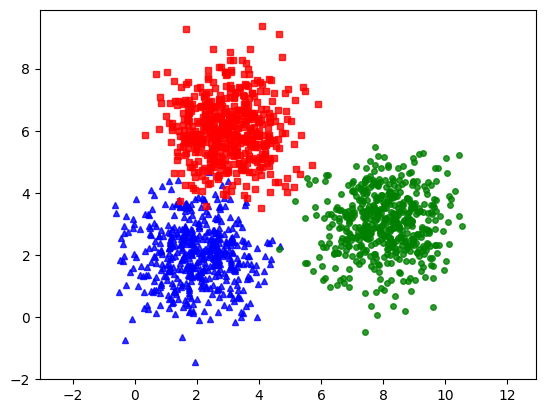

In [34]:
# Phương thức để hiển thị dữ liệu X lên mặt phẳng
def kmeans_display(X, label):
    K = np.amax(label) + 1 
    X0 = X[label == 0, :] 
    X1 = X[label == 1, :] 
    X2 = X[label == 2, :] 
     
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8) 
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8) 
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8) 

    plt.axis('equal') 
    plt.plot() 
    plt.show()

# Hiển thị dữ liệu ban đầu với nhãn gốc
print("Dữ liệu ban đầu với nhãn gốc:")
kmeans_display(X, original_label)

#### Xây dựng các hàm cần thiết cho K-means

In [35]:
# Khởi tạo một bộ tâm cụm trên dữ liệu X với giả thiết có k cụm
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [36]:
# Phương thức để gán cụm cho một điểm dữ liệu
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers) 
    # return index of the closest center
    return np.argmin(D, axis = 1)

In [37]:
# Phương thức để cập nhật lại tâm cụm sau mỗi bước lặp
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1])) 
    for k in range(K): 
        # collect all points assigned to the k-th cluster  
        Xk = X[labels == k, :] 
        # take average
        centers[k,:] = np.mean(Xk, axis = 0) 
    return centers

In [38]:
# Hàm để kiểm tra xem thuật toán có hội tụ hay không
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) ==  
        set([tuple(a) for a in new_centers]))

In [39]:
# Vòng lặp để thực hiện tất cả các bước trong thuật toán k-means
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)] 
    labels = [] 
    it = 0  
    while True: 
        labels.append(kmeans_assign_labels(X, centers[-1])) 
        new_centers = kmeans_update_centers(X, labels[-1], K) 
        if has_converged(centers[-1], new_centers): 
            break 
        centers.append(new_centers) 
        it += 1 
    return (centers, labels, it)

Centers found by our algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]

Số vòng lặp: 5

Kết quả phân cụm bằng thuật toán tự xây dựng:


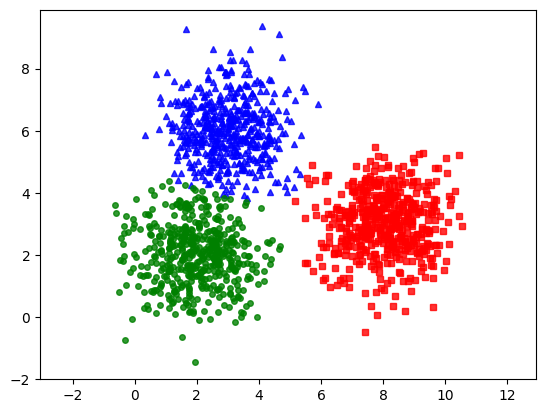

In [40]:
# Gọi và thực hiện phương pháp K-means tự xây dựng
(centers, labels, it) = kmeans(X, K) 
print('Centers found by our algorithm:') 
print(centers[-1])
print(f'\nSố vòng lặp: {it}')

print("\nKết quả phân cụm bằng thuật toán tự xây dựng:")
kmeans_display(X, labels[-1])

### 1.2. Thực hiện bằng thư viện sklearn

Centers found by scikit-learn:
[[1.97826939 2.00223913]
 [2.98759958 6.02896527]
 [8.0410628  3.02094748]]

Kết quả phân cụm bằng scikit-learn:


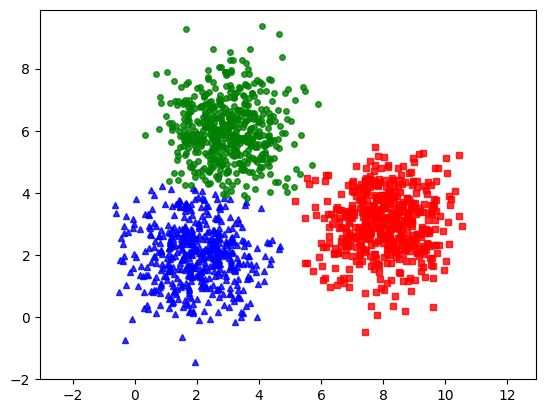

In [41]:
from sklearn.cluster import KMeans

# Khởi tạo và huấn luyện mô hình K-means
kmeans = KMeans(n_clusters=3, random_state=0).fit(X) 

print('Centers found by scikit-learn:') 
print(kmeans.cluster_centers_) 

# Dự đoán nhãn
pred_label = kmeans.predict(X) 

print("\nKết quả phân cụm bằng scikit-learn:")
kmeans_display(X, pred_label)

### 1.3. Ví dụ 2: Thực hiện phân cụm cho bộ dữ liệu chữ số viết tay MNIST

Trong phần này, chúng ta sẽ:
1. Đọc 5000 mẫu dữ liệu từ phần training
2. Thực hiện phân cụm bằng K-means vào 10 cụm
3. Kiểm tra trong mỗi cụm, nhãn nào có tỷ lệ cao nhất
4. Tính tỷ lệ các mẫu không thuộc nhãn đó nhưng được phân vào cùng cụm

In [ ]:
# Import các thư viện cần thiết
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.neighbors import NearestNeighbors 
from sklearn.preprocessing import normalize

In [55]:
# Đọc dữ liệu MNIST từ file idx
import idx2numpy

# Đường dẫn đến thư mục chứa dữ liệu MNIST
train_images_path = r'B:\Hanoi University of Science\TaiLieuOnThi\2025-20261\ML-Fundamentals\week-05-svm-decision-tree\data\train-images.idx3-ubyte'
train_labels_path = r'B:\Hanoi University of Science\TaiLieuOnThi\2025-20261\ML-Fundamentals\week-05-svm-decision-tree\data\train-labels.idx1-ubyte'

# Đọc dữ liệu bằng idx2numpy
train_images = idx2numpy.convert_from_file(train_images_path)
train_labels = idx2numpy.convert_from_file(train_labels_path)

# Lấy 5000 mẫu đầu tiên và reshape về dạng 2D (flatten)
X_train = train_images[:5000].reshape(5000, -1)
y_train = train_labels[:5000]

print(f"Kích thước dữ liệu training: {X_train.shape}")
print(f"Kích thước nhãn: {y_train.shape}")
print(f"Các nhãn duy nhất: {np.unique(y_train)}")

Kích thước dữ liệu training: (5000, 784)
Kích thước nhãn: (5000,)
Các nhãn duy nhất: [0 1 2 3 4 5 6 7 8 9]


Một số mẫu từ dữ liệu MNIST:


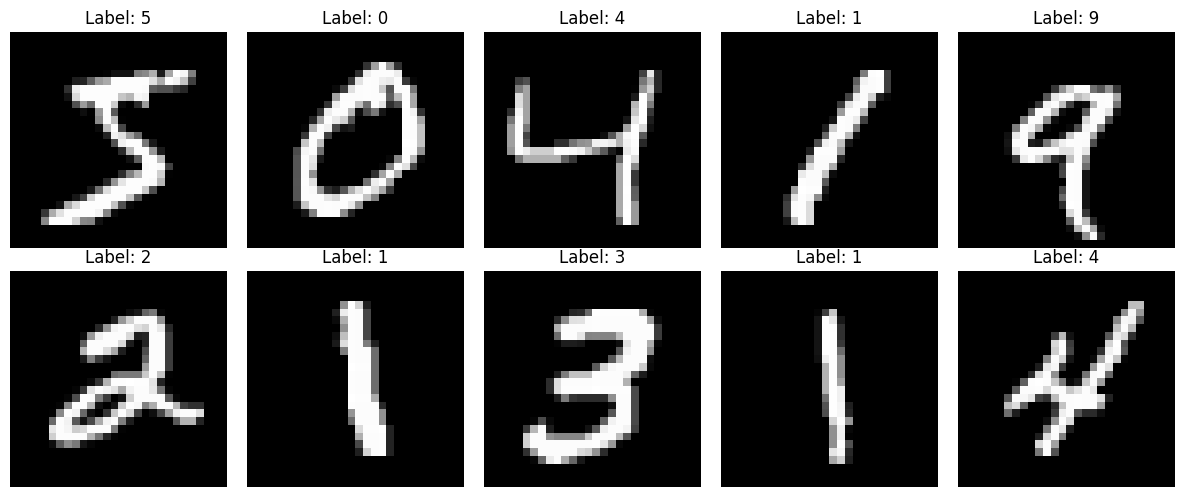

In [56]:
# Hiển thị một số ví dụ từ dữ liệu
def display_mnist_samples(X, y, n_samples=10):
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    axes = axes.ravel()
    
    for i in range(n_samples):
        img = X[i].reshape(28, 28)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'Label: {y[i]}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

print("Một số mẫu từ dữ liệu MNIST:")
display_mnist_samples(X_train, y_train)

In [57]:
# Chuẩn hóa dữ liệu
X_train_normalized = normalize(X_train, norm='l2')

# Thực hiện K-means clustering với K=10
n_clusters = 10
print(f"Đang thực hiện K-means clustering với {n_clusters} cụm...")
kmeans_mnist = KMeans(n_clusters=n_clusters, random_state=42, max_iter=300)
cluster_labels = kmeans_mnist.fit_predict(X_train_normalized)

print("Hoàn thành phân cụm!")
print(f"Inertia: {kmeans_mnist.inertia_:.2f}")

Đang thực hiện K-means clustering với 10 cụm...
Hoàn thành phân cụm!
Inertia: 2180.06
Hoàn thành phân cụm!
Inertia: 2180.06


In [58]:
# Phân tích kết quả phân cụm
def analyze_clusters(cluster_labels, true_labels, n_clusters):
    """
    Phân tích kết quả phân cụm:
    - Tìm nhãn phổ biến nhất trong mỗi cụm
    - Tính tỷ lệ mẫu không thuộc nhãn đó
    """
    results = []
    
    print("=" * 80)
    print("PHÂN TÍCH KẾT QUẢ PHÂN CỤM")
    print("=" * 80)
    
    for cluster_id in range(n_clusters):
        # Lấy các mẫu thuộc cụm hiện tại
        mask = cluster_labels == cluster_id
        cluster_true_labels = true_labels[mask]
        cluster_size = len(cluster_true_labels)
        
        if cluster_size == 0:
            continue
        
        # Đếm số lượng mỗi nhãn trong cụm
        unique_labels, counts = np.unique(cluster_true_labels, return_counts=True)
        
        # Tìm nhãn phổ biến nhất
        max_idx = np.argmax(counts)
        dominant_label = unique_labels[max_idx]
        dominant_count = counts[max_idx]
        
        # Tính tỷ lệ mẫu không thuộc nhãn phổ biến nhất
        misclassified_count = cluster_size - dominant_count
        misclassified_ratio = (misclassified_count / cluster_size) * 100
        
        results.append({
            'cluster_id': cluster_id,
            'cluster_size': cluster_size,
            'dominant_label': dominant_label,
            'dominant_count': dominant_count,
            'misclassified_count': misclassified_count,
            'misclassified_ratio': misclassified_ratio
        })
        
        print(f"\nCụm {cluster_id}:")
        print(f"  - Tổng số mẫu: {cluster_size}")
        print(f"  - Nhãn phổ biến nhất: {dominant_label}")
        print(f"  - Số mẫu có nhãn {dominant_label}: {dominant_count} ({dominant_count/cluster_size*100:.2f}%)")
        print(f"  - Số mẫu không có nhãn {dominant_label}: {misclassified_count} ({misclassified_ratio:.2f}%)")
        print(f"  - Phân bố nhãn: {dict(zip(unique_labels, counts))}")
    
    return results

# Thực hiện phân tích
cluster_analysis = analyze_clusters(cluster_labels, y_train, n_clusters)

PHÂN TÍCH KẾT QUẢ PHÂN CỤM

Cụm 0:
  - Tổng số mẫu: 782
  - Nhãn phổ biến nhất: 3
  - Số mẫu có nhãn 3: 365 (46.68%)
  - Số mẫu không có nhãn 3: 417 (53.32%)
  - Phân bố nhãn: {np.uint8(0): np.int64(9), np.uint8(1): np.int64(2), np.uint8(2): np.int64(48), np.uint8(3): np.int64(365), np.uint8(4): np.int64(1), np.uint8(5): np.int64(173), np.uint8(6): np.int64(3), np.uint8(8): np.int64(172), np.uint8(9): np.int64(9)}

Cụm 1:
  - Tổng số mẫu: 469
  - Nhãn phổ biến nhất: 2
  - Số mẫu có nhãn 2: 381 (81.24%)
  - Số mẫu không có nhãn 2: 88 (18.76%)
  - Phân bố nhãn: {np.uint8(1): np.int64(1), np.uint8(2): np.int64(381), np.uint8(3): np.int64(10), np.uint8(4): np.int64(11), np.uint8(5): np.int64(2), np.uint8(6): np.int64(51), np.uint8(7): np.int64(6), np.uint8(8): np.int64(6), np.uint8(9): np.int64(1)}

Cụm 2:
  - Tổng số mẫu: 459
  - Nhãn phổ biến nhất: 0
  - Số mẫu có nhãn 0: 415 (90.41%)
  - Số mẫu không có nhãn 0: 44 (9.59%)
  - Phân bố nhãn: {np.uint8(0): np.int64(415), np.uint8(2): np.in

In [60]:
# Tính tỷ lệ phân cụm sai trung bình
total_misclassified = sum(r['misclassified_count'] for r in cluster_analysis)
total_samples = sum(r['cluster_size'] for r in cluster_analysis)
average_misclassified_ratio = (total_misclassified / total_samples) * 100

print("\n" + "=" * 80)
print("TỔNG KẾT")
print("=" * 80)
print(f"Tổng số mẫu: {total_samples}")
print(f"Tổng số mẫu bị phân cụm sai: {total_misclassified}")
print(f"Tỷ lệ phân cụm sai trung bình: {average_misclassified_ratio:.2f}%")
print(f"Độ chính xác phân cụm: {100 - average_misclassified_ratio:.2f}%")


TỔNG KẾT
Tổng số mẫu: 5000
Tổng số mẫu bị phân cụm sai: 2013
Tỷ lệ phân cụm sai trung bình: 40.26%
Độ chính xác phân cụm: 59.74%


In [61]:
# Phân tích chi tiết cho từng nhãn (0-9)
print("\n" + "=" * 80)
print("PHÂN TÍCH THEO TỪNG NHÃN (0-9)")
print("=" * 80)

for true_digit in range(10):
    # Tìm tất cả mẫu có nhãn thực là true_digit
    digit_mask = y_train == true_digit
    digit_samples = np.sum(digit_mask)
    
    # Xem các mẫu này được phân vào cụm nào
    digit_cluster_labels = cluster_labels[digit_mask]
    
    # Tìm cụm xuất hiện nhiều nhất
    unique_clusters, cluster_counts = np.unique(digit_cluster_labels, return_counts=True)
    dominant_cluster = unique_clusters[np.argmax(cluster_counts)]
    dominant_cluster_count = np.max(cluster_counts)
    
    # Tính tỷ lệ được phân đúng vào cụm chủ đạo
    correct_ratio = (dominant_cluster_count / digit_samples) * 100
    misclassified_ratio = 100 - correct_ratio
    
    print(f"\nChữ số {true_digit}:")
    print(f"  - Tổng số mẫu: {digit_samples}")
    print(f"  - Cụm chủ đạo: {dominant_cluster}")
    print(f"  - Số mẫu trong cụm chủ đạo: {dominant_cluster_count} ({correct_ratio:.2f}%)")
    print(f"  - Số mẫu phân sai: {digit_samples - dominant_cluster_count} ({misclassified_ratio:.2f}%)")
    print(f"  - Phân bố theo cụm: {dict(zip(unique_clusters, cluster_counts))}")


PHÂN TÍCH THEO TỪNG NHÃN (0-9)

Chữ số 0:
  - Tổng số mẫu: 479
  - Cụm chủ đạo: 2
  - Số mẫu trong cụm chủ đạo: 415 (86.64%)
  - Số mẫu phân sai: 64 (13.36%)
  - Phân bố theo cụm: {np.int32(0): np.int64(9), np.int32(2): np.int64(415), np.int32(7): np.int64(23), np.int32(8): np.int64(31), np.int32(9): np.int64(1)}

Chữ số 1:
  - Tổng số mẫu: 563
  - Cụm chủ đạo: 6
  - Số mẫu trong cụm chủ đạo: 286 (50.80%)
  - Số mẫu phân sai: 277 (49.20%)
  - Phân bố theo cụm: {np.int32(0): np.int64(2), np.int32(1): np.int64(1), np.int32(3): np.int64(260), np.int32(6): np.int64(286), np.int32(8): np.int64(13), np.int32(9): np.int64(1)}

Chữ số 2:
  - Tổng số mẫu: 488
  - Cụm chủ đạo: 1
  - Số mẫu trong cụm chủ đạo: 381 (78.07%)
  - Số mẫu phân sai: 107 (21.93%)
  - Phân bố theo cụm: {np.int32(0): np.int64(48), np.int32(1): np.int64(381), np.int32(2): np.int64(6), np.int32(3): np.int64(15), np.int32(4): np.int64(2), np.int32(5): np.int64(2), np.int32(6): np.int64(4), np.int32(7): np.int64(9), np.int32(

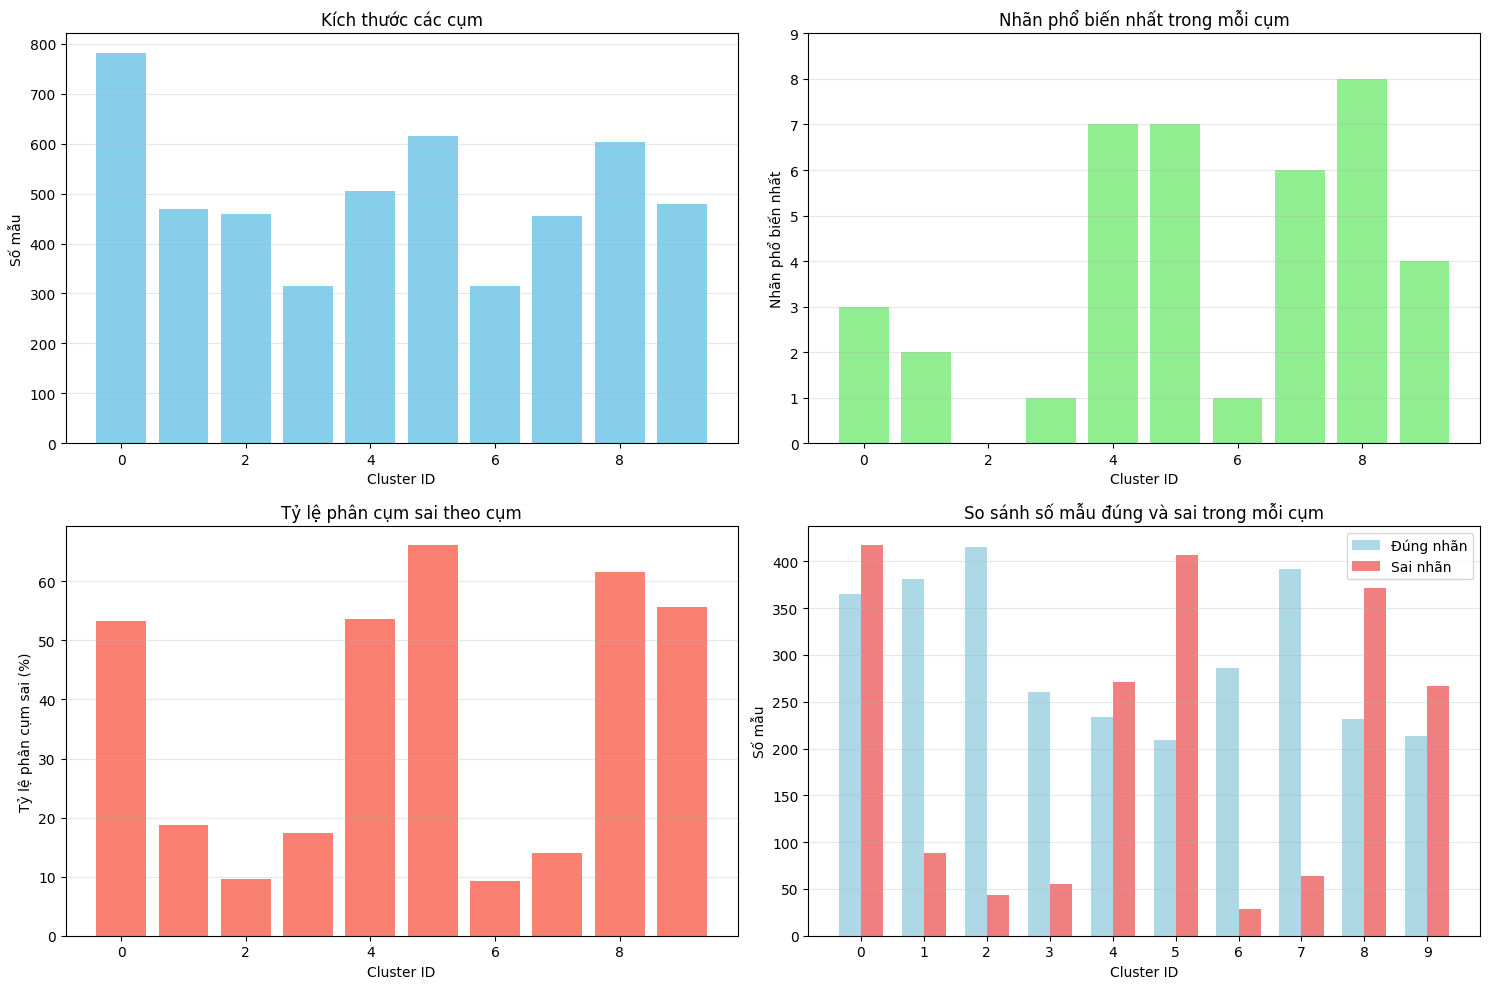

In [62]:
# Hiển thị biểu đồ phân tích
def plot_cluster_analysis(cluster_analysis):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Biểu đồ 1: Kích thước các cụm
    cluster_ids = [r['cluster_id'] for r in cluster_analysis]
    cluster_sizes = [r['cluster_size'] for r in cluster_analysis]
    axes[0, 0].bar(cluster_ids, cluster_sizes, color='skyblue')
    axes[0, 0].set_xlabel('Cluster ID')
    axes[0, 0].set_ylabel('Số mẫu')
    axes[0, 0].set_title('Kích thước các cụm')
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Biểu đồ 2: Nhãn phổ biến nhất trong mỗi cụm
    dominant_labels = [r['dominant_label'] for r in cluster_analysis]
    axes[0, 1].bar(cluster_ids, dominant_labels, color='lightgreen')
    axes[0, 1].set_xlabel('Cluster ID')
    axes[0, 1].set_ylabel('Nhãn phổ biến nhất')
    axes[0, 1].set_title('Nhãn phổ biến nhất trong mỗi cụm')
    axes[0, 1].set_yticks(range(10))
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Biểu đồ 3: Tỷ lệ phân cụm sai
    misclassified_ratios = [r['misclassified_ratio'] for r in cluster_analysis]
    axes[1, 0].bar(cluster_ids, misclassified_ratios, color='salmon')
    axes[1, 0].set_xlabel('Cluster ID')
    axes[1, 0].set_ylabel('Tỷ lệ phân cụm sai (%)')
    axes[1, 0].set_title('Tỷ lệ phân cụm sai theo cụm')
    axes[1, 0].grid(axis='y', alpha=0.3)
    
    # Biểu đồ 4: So sánh số mẫu đúng và sai
    dominant_counts = [r['dominant_count'] for r in cluster_analysis]
    misclassified_counts = [r['misclassified_count'] for r in cluster_analysis]
    
    x = np.arange(len(cluster_ids))
    width = 0.35
    
    axes[1, 1].bar(x - width/2, dominant_counts, width, label='Đúng nhãn', color='lightblue')
    axes[1, 1].bar(x + width/2, misclassified_counts, width, label='Sai nhãn', color='lightcoral')
    axes[1, 1].set_xlabel('Cluster ID')
    axes[1, 1].set_ylabel('Số mẫu')
    axes[1, 1].set_title('So sánh số mẫu đúng và sai trong mỗi cụm')
    axes[1, 1].set_xticks(x)
    axes[1, 1].set_xticklabels(cluster_ids)
    axes[1, 1].legend()
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_cluster_analysis(cluster_analysis)

Hiển thị các tâm cụm:


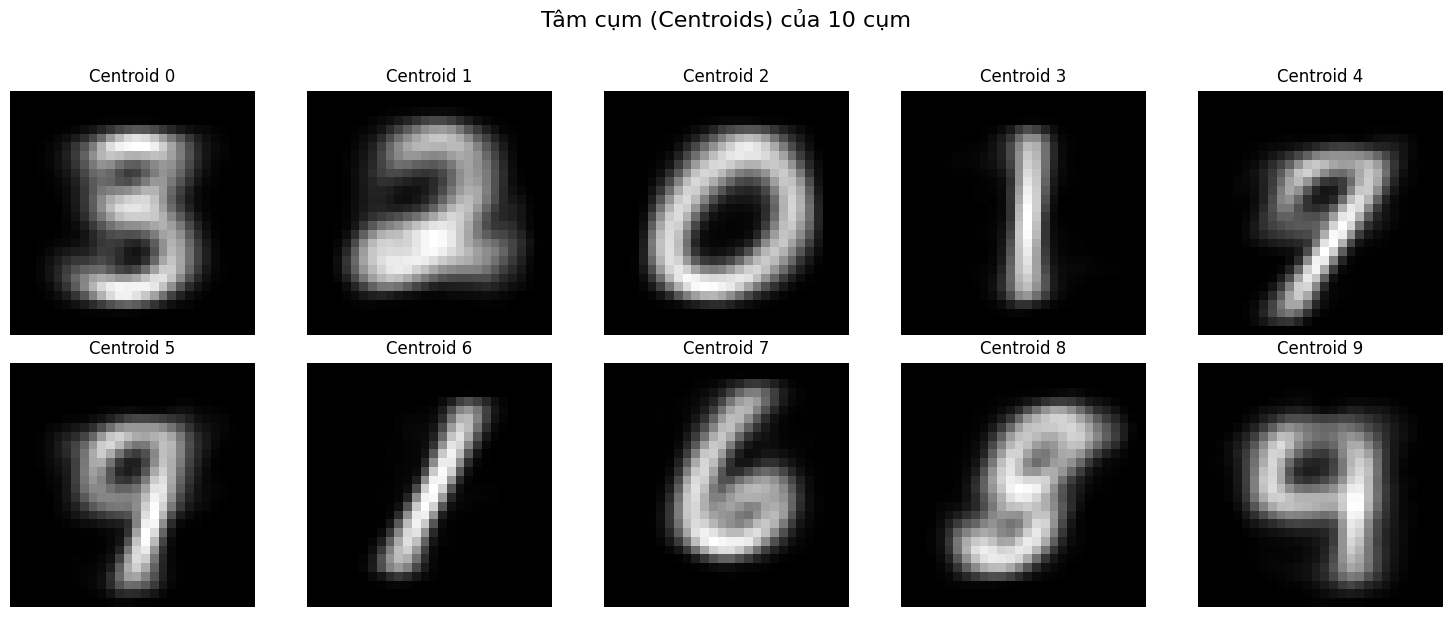

In [63]:
# Hiển thị các centroid của từng cụm
def display_cluster_centers(kmeans_model, n_clusters):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()
    
    for i in range(n_clusters):
        center = kmeans_model.cluster_centers_[i]
        # Denormalize if needed
        center_img = center.reshape(28, 28)
        axes[i].imshow(center_img, cmap='gray')
        axes[i].set_title(f'Centroid {i}')
        axes[i].axis('off')
    
    plt.suptitle('Tâm cụm (Centroids) của 10 cụm', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

print("Hiển thị các tâm cụm:")
display_cluster_centers(kmeans_mnist, n_clusters)

Hiển thị các centroid dưới dạng grid:


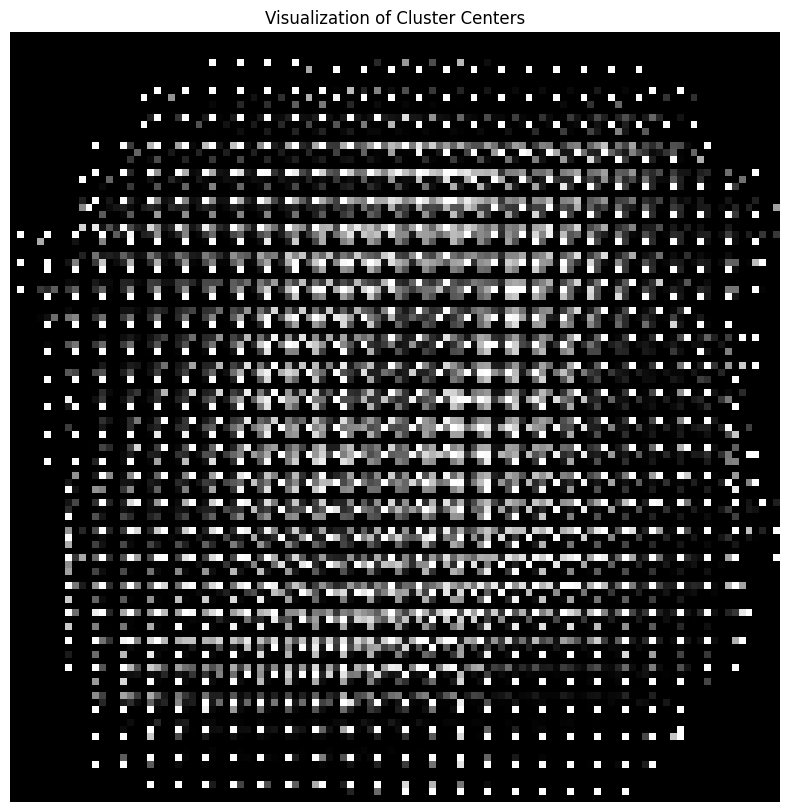

In [65]:
# Hàm visualization cho filters/centroids
def vis_square(data, padsize=1, padval=0, opt_normalize=True, opt_graycolor=True):
    """
    Visualize filters/centroids in matrix data.
    Accepts:
      - data shape (n_filters, n_pixels) where each row is a flattened filter/image
      - or data shape (n_pixels, n_filters) where each column is a filter (the function will transpose)
      - or data with dims (n_filters, h, w) or (n_filters, h, w, c)
    """
    # Work on a copy
    data = np.array(data, copy=True)
    
    # If input is (n_pixels, n_filters), transpose to (n_filters, n_pixels)
    if data.ndim == 2 and data.shape[0] < data.shape[1]:
        data = data.T
    
    # Convert flattened filters to (n_filters, h, w, c)
    if data.ndim == 2:
        n_filters, n_pixels = data.shape
        side = int(np.ceil(np.sqrt(n_pixels)))
        if side * side != n_pixels:
            pad_len = side * side - n_pixels
            data = np.pad(data, ((0, 0), (0, pad_len)), mode='constant', constant_values=padval)
            n_pixels = side * side
        data = data.reshape((n_filters, side, side, 1))
    elif data.ndim == 3:
        # assume (n_filters, h, w) -> add channel dim
        data = data.reshape((data.shape[0], data.shape[1], data.shape[2], 1))
        n_filters = data.shape[0]
    elif data.ndim == 4:
        n_filters = data.shape[0]
    else:
        raise ValueError("Unsupported data shape for vis_square: {}".format(data.shape))
    
    # Normalize each filter independently for better contrast if requested
    if opt_normalize:
        for i in range(n_filters):
            f = data[i]
            f_min = f.min()
            f = f - f_min
            f_max = f.max()
            if f_max > 0:
                f = f / f_max
            data[i] = f
    
    # Tile filters into a square grid
    n = int(np.ceil(np.sqrt(n_filters)))
    pad_filters = n * n - n_filters
    if pad_filters > 0:
        pad_block = np.full((pad_filters, data.shape[1], data.shape[2], data.shape[3]), padval, dtype=data.dtype)
        data = np.vstack([data, pad_block])
    
    # reshape to grid
    data = data.reshape((n, n, data.shape[1], data.shape[2], data.shape[3]))
    # move tiles to image
    data = data.transpose(0, 2, 1, 3, 4).reshape(n * data.shape[2], n * data.shape[3], data.shape[4])
    
    # squeeze channel if grayscale
    if data.shape[2] == 1:
        img = data.squeeze(axis=2)
        cmap = 'gray' if opt_graycolor else None
    else:
        img = data
        cmap = None
    
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap=cmap, interpolation='nearest')
    plt.axis('off')
    plt.title('Visualization of Cluster Centers')
    plt.show()

# Hiển thị centroids dưới dạng grid
print("Hiển thị các centroid dưới dạng grid:")
# pass cluster centers with shape (n_centroids, n_pixels)
vis_square(kmeans_mnist.cluster_centers_)

Hiển thị một số mẫu từ mỗi cụm:


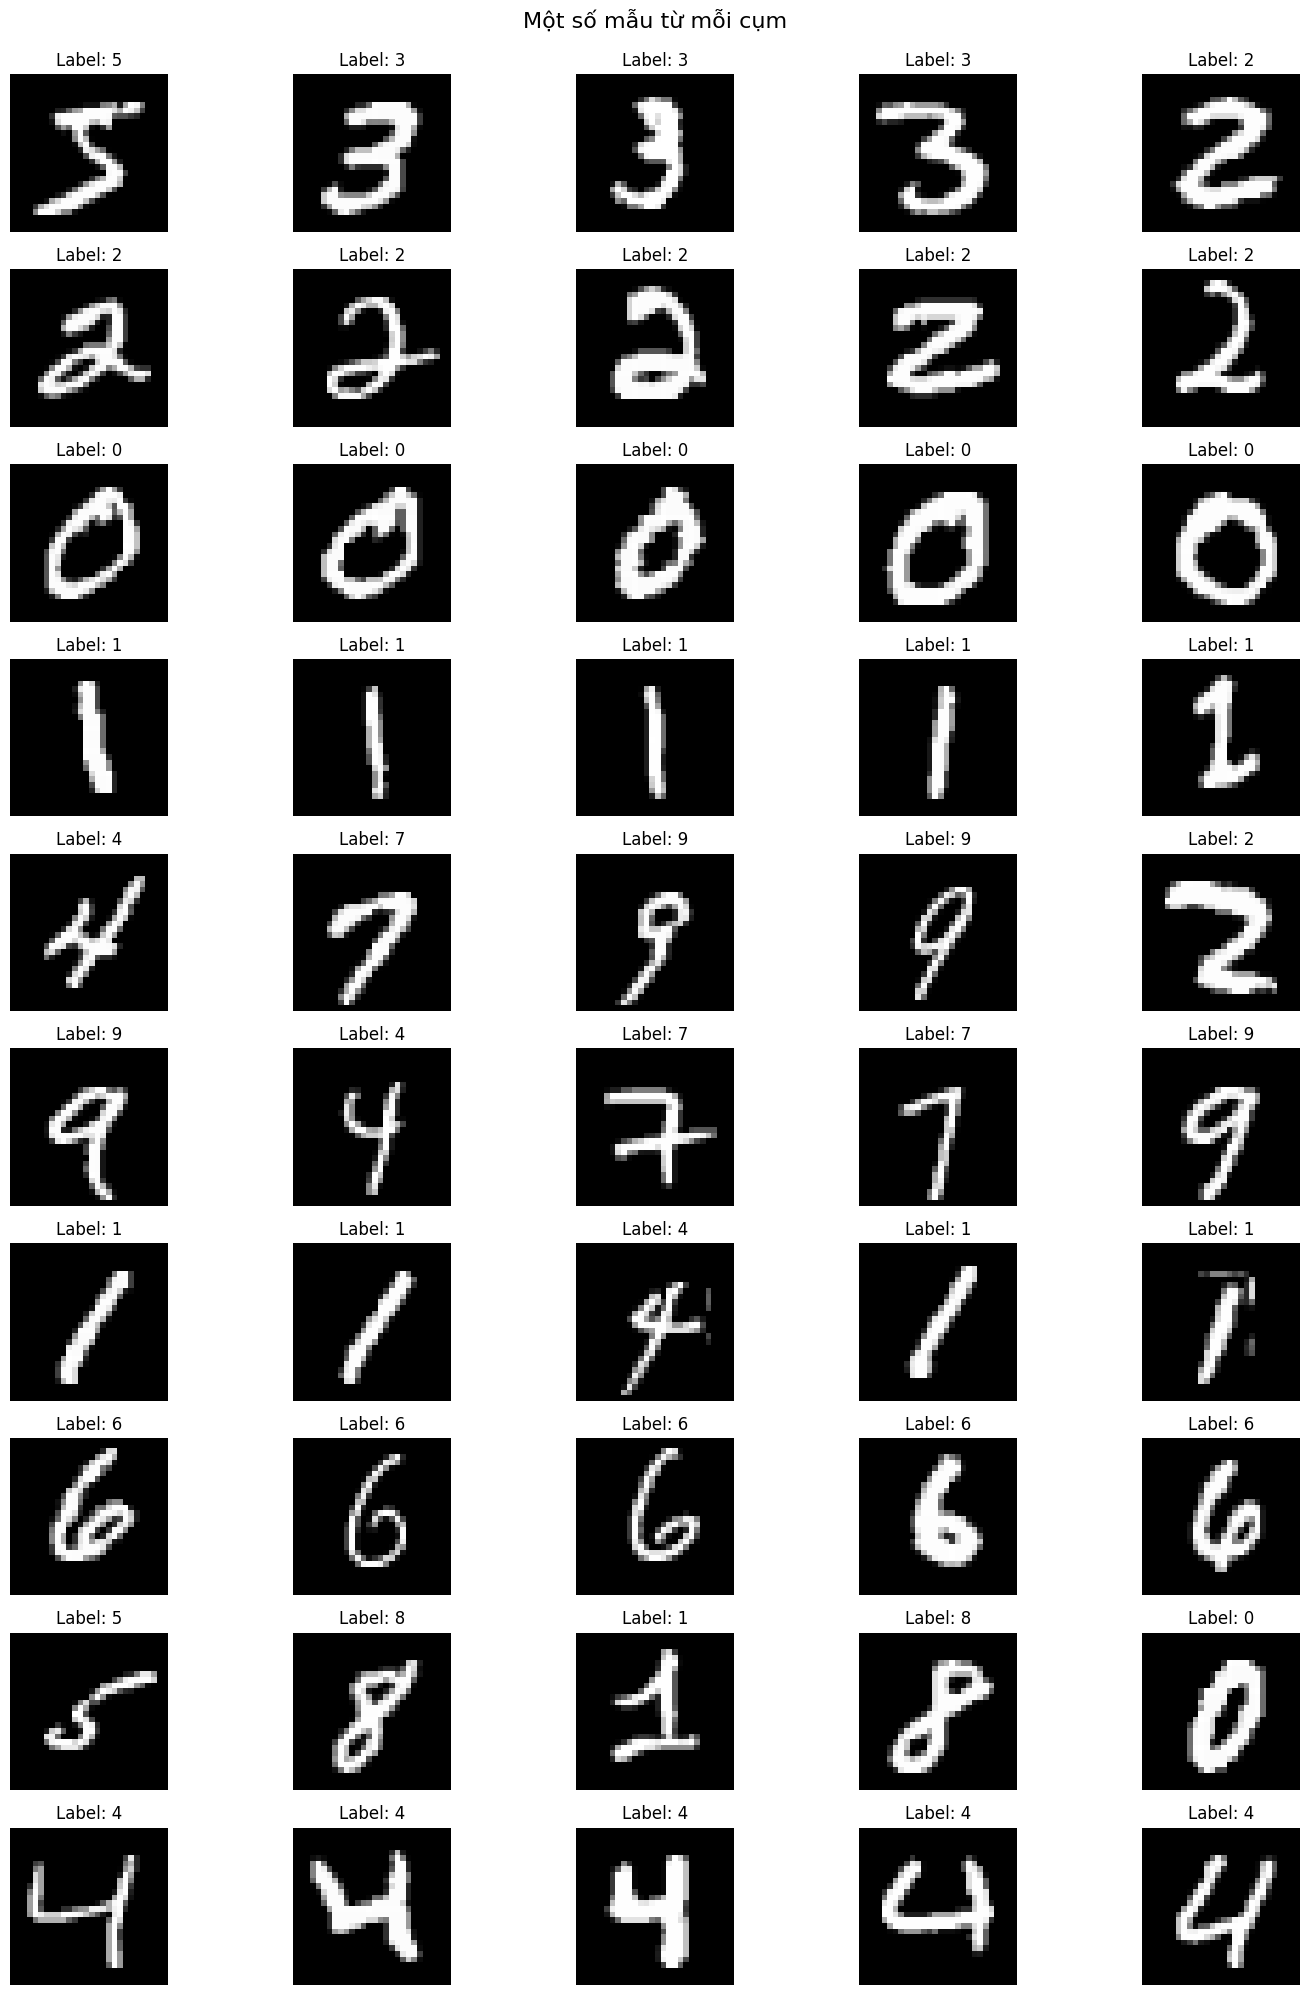

In [66]:
# Hiển thị một số mẫu từ mỗi cụm
def display_samples_from_clusters(X, cluster_labels, true_labels, n_clusters, n_samples=5):
    fig, axes = plt.subplots(n_clusters, n_samples, figsize=(15, 20))
    
    for cluster_id in range(n_clusters):
        # Lấy các mẫu thuộc cụm hiện tại
        mask = cluster_labels == cluster_id
        cluster_samples = X[mask]
        cluster_true_labels = true_labels[mask]
        
        # Lấy n_samples mẫu đầu tiên
        n_to_show = min(n_samples, len(cluster_samples))
        
        for i in range(n_to_show):
            img = cluster_samples[i].reshape(28, 28)
            axes[cluster_id, i].imshow(img, cmap='gray')
            axes[cluster_id, i].set_title(f'Label: {cluster_true_labels[i]}')
            axes[cluster_id, i].axis('off')
        
        # Xóa các ô trống nếu có
        for i in range(n_to_show, n_samples):
            axes[cluster_id, i].axis('off')
        
        # Thêm label cho hàng
        axes[cluster_id, 0].set_ylabel(f'Cluster {cluster_id}', fontsize=12, rotation=0, 
                                       labelpad=40, va='center')
    
    plt.suptitle('Một số mẫu từ mỗi cụm', fontsize=16, y=0.995)
    plt.tight_layout()
    plt.show()

print("Hiển thị một số mẫu từ mỗi cụm:")
display_samples_from_clusters(X_train, cluster_labels, y_train, n_clusters)

## PHẦN 2: THUẬT TOÁN DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) là thuật toán phân cụm dựa trên mật độ.

### 2.1. Xây dựng thuật toán DBSCAN từ numpy

In [67]:
import numpy as np
from matplotlib import pyplot as plt

class DBSCAN(object):

    def __init__(self, x, epsilon, minpts):
        # The number of input dataset
        self.n = len(x)
        # Euclidean distance
        p, q = np.meshgrid(np.arange(self.n), np.arange(self.n))
        self.dist = np.sqrt(np.sum(((x[p] - x[q])**2), 2))
        # label as visited points and noise
        self.visited = np.full((self.n), False)
        self.noise = np.full((self.n), False)
        # DBSCAN Parameters
        self.epsilon = epsilon
        self.minpts = minpts
        # Cluster
        self.idx = np.full((self.n), 0)
        self.C = 0
        self.input = x

    def run(self):
        # Clustering
        for i in range(len(self.input)):
            if self.visited[i] == False:
                self.visited[i] = True
                self.neighbors = self.regionQuery(i)
                if len(self.neighbors) >= self.minpts:
                    self.C += 1
                    self.expandCluster(i)
                else:
                    self.noise[i] = True
        return self.idx, self.noise

    def regionQuery(self, i):
        g = self.dist[i, :] < self.epsilon
        Neighbors = np.where(g)[0].tolist()
        return Neighbors

    def expandCluster(self, i):
        self.idx[i] = self.C
        k = 0
       
        while True:
            if len(self.neighbors) <= k:
                return
            j = self.neighbors[k]
            if self.visited[j] != True:
                self.visited[j] = True
                self.neighbors2 = self.regionQuery(j)
                if len(self.neighbors2) >= self.minpts:
                    self.neighbors = self.neighbors + self.neighbors2
            if self.idx[j] == 0:
                self.idx[j] = self.C
            k += 1

### 2.2. Áp dụng DBSCAN cho dữ liệu input.csv

In [68]:
import pandas as pd

# Đọc dữ liệu từ file input.csv
data = pd.read_csv('input.csv')
print("Thông tin dữ liệu:")
print(data.info())
print("\nMột số dòng đầu tiên:")
print(data.head(10))

# Chuyển đổi thành numpy array
X_dbscan = data.values
print(f"\nKích thước dữ liệu: {X_dbscan.shape}")

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      256 non-null    float64
 1   x2      256 non-null    float64
dtypes: float64(2)
memory usage: 4.1 KB
None

Một số dòng đầu tiên:
         x1        x2
0  5.954795  5.550627
1  5.558277  5.608027
2  3.141703  4.069789
3  4.986940  5.135376
4  5.402934  2.604591
5  5.050955  4.613844
6  6.364144  5.135091
7  5.386443  3.291581
8  6.164613  4.322702
9  3.504280  3.458735

Kích thước dữ liệu: (256, 2)


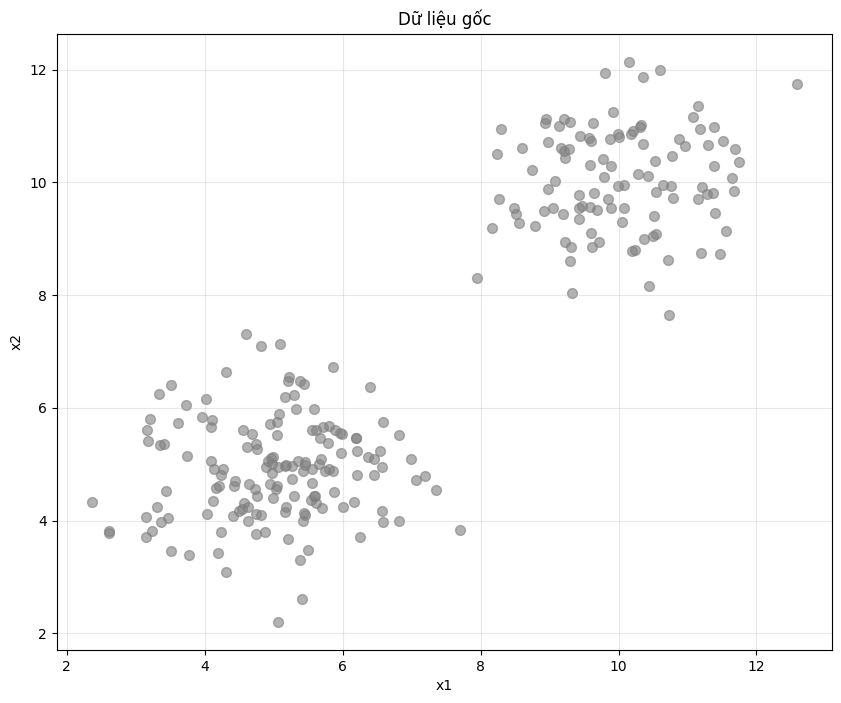

In [69]:
# Hiển thị dữ liệu gốc
plt.figure(figsize=(10, 8))
plt.scatter(X_dbscan[:, 0], X_dbscan[:, 1], c='gray', alpha=0.6, s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dữ liệu gốc')
plt.grid(True, alpha=0.3)
plt.show()

In [70]:
# Thử nghiệm với các tham số khác nhau
epsilon_values = [0.3, 0.5, 0.7]
minpts_values = [3, 5, 10]

print("Thử nghiệm với các tham số khác nhau:\n")
print("=" * 80)

results = []

for eps in epsilon_values:
    for minpts in minpts_values:
        # Khởi tạo và chạy DBSCAN
        dbscan = DBSCAN(X_dbscan, epsilon=eps, minpts=minpts)
        idx, noise = dbscan.run()
        
        # Thống kê kết quả
        n_clusters = len(np.unique(idx[idx > 0]))
        n_noise = np.sum(noise)
        
        results.append({
            'epsilon': eps,
            'minpts': minpts,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'idx': idx.copy(),
            'noise': noise.copy()
        })
        
        print(f"Epsilon = {eps}, MinPts = {minpts}:")
        print(f"  - Số cụm tìm được: {n_clusters}")
        print(f"  - Số điểm nhiễu: {n_noise} ({n_noise/len(X_dbscan)*100:.2f}%)")
        print()

Thử nghiệm với các tham số khác nhau:

Epsilon = 0.3, MinPts = 3:
  - Số cụm tìm được: 16
  - Số điểm nhiễu: 58 (22.66%)

Epsilon = 0.3, MinPts = 5:
  - Số cụm tìm được: 10
  - Số điểm nhiễu: 120 (46.88%)

Epsilon = 0.3, MinPts = 10:
  - Số cụm tìm được: 1
  - Số điểm nhiễu: 231 (90.23%)

Epsilon = 0.5, MinPts = 3:
  - Số cụm tìm được: 4
  - Số điểm nhiễu: 14 (5.47%)

Epsilon = 0.5, MinPts = 5:
  - Số cụm tìm được: 3
  - Số điểm nhiễu: 29 (11.33%)

Epsilon = 0.5, MinPts = 10:
  - Số cụm tìm được: 4
  - Số điểm nhiễu: 88 (34.38%)

Epsilon = 0.7, MinPts = 3:
  - Số cụm tìm được: 3
  - Số điểm nhiễu: 3 (1.17%)

Epsilon = 0.7, MinPts = 5:
  - Số cụm tìm được: 2
  - Số điểm nhiễu: 9 (3.52%)

Epsilon = 0.7, MinPts = 10:
  - Số cụm tìm được: 3
  - Số điểm nhiễu: 23 (8.98%)



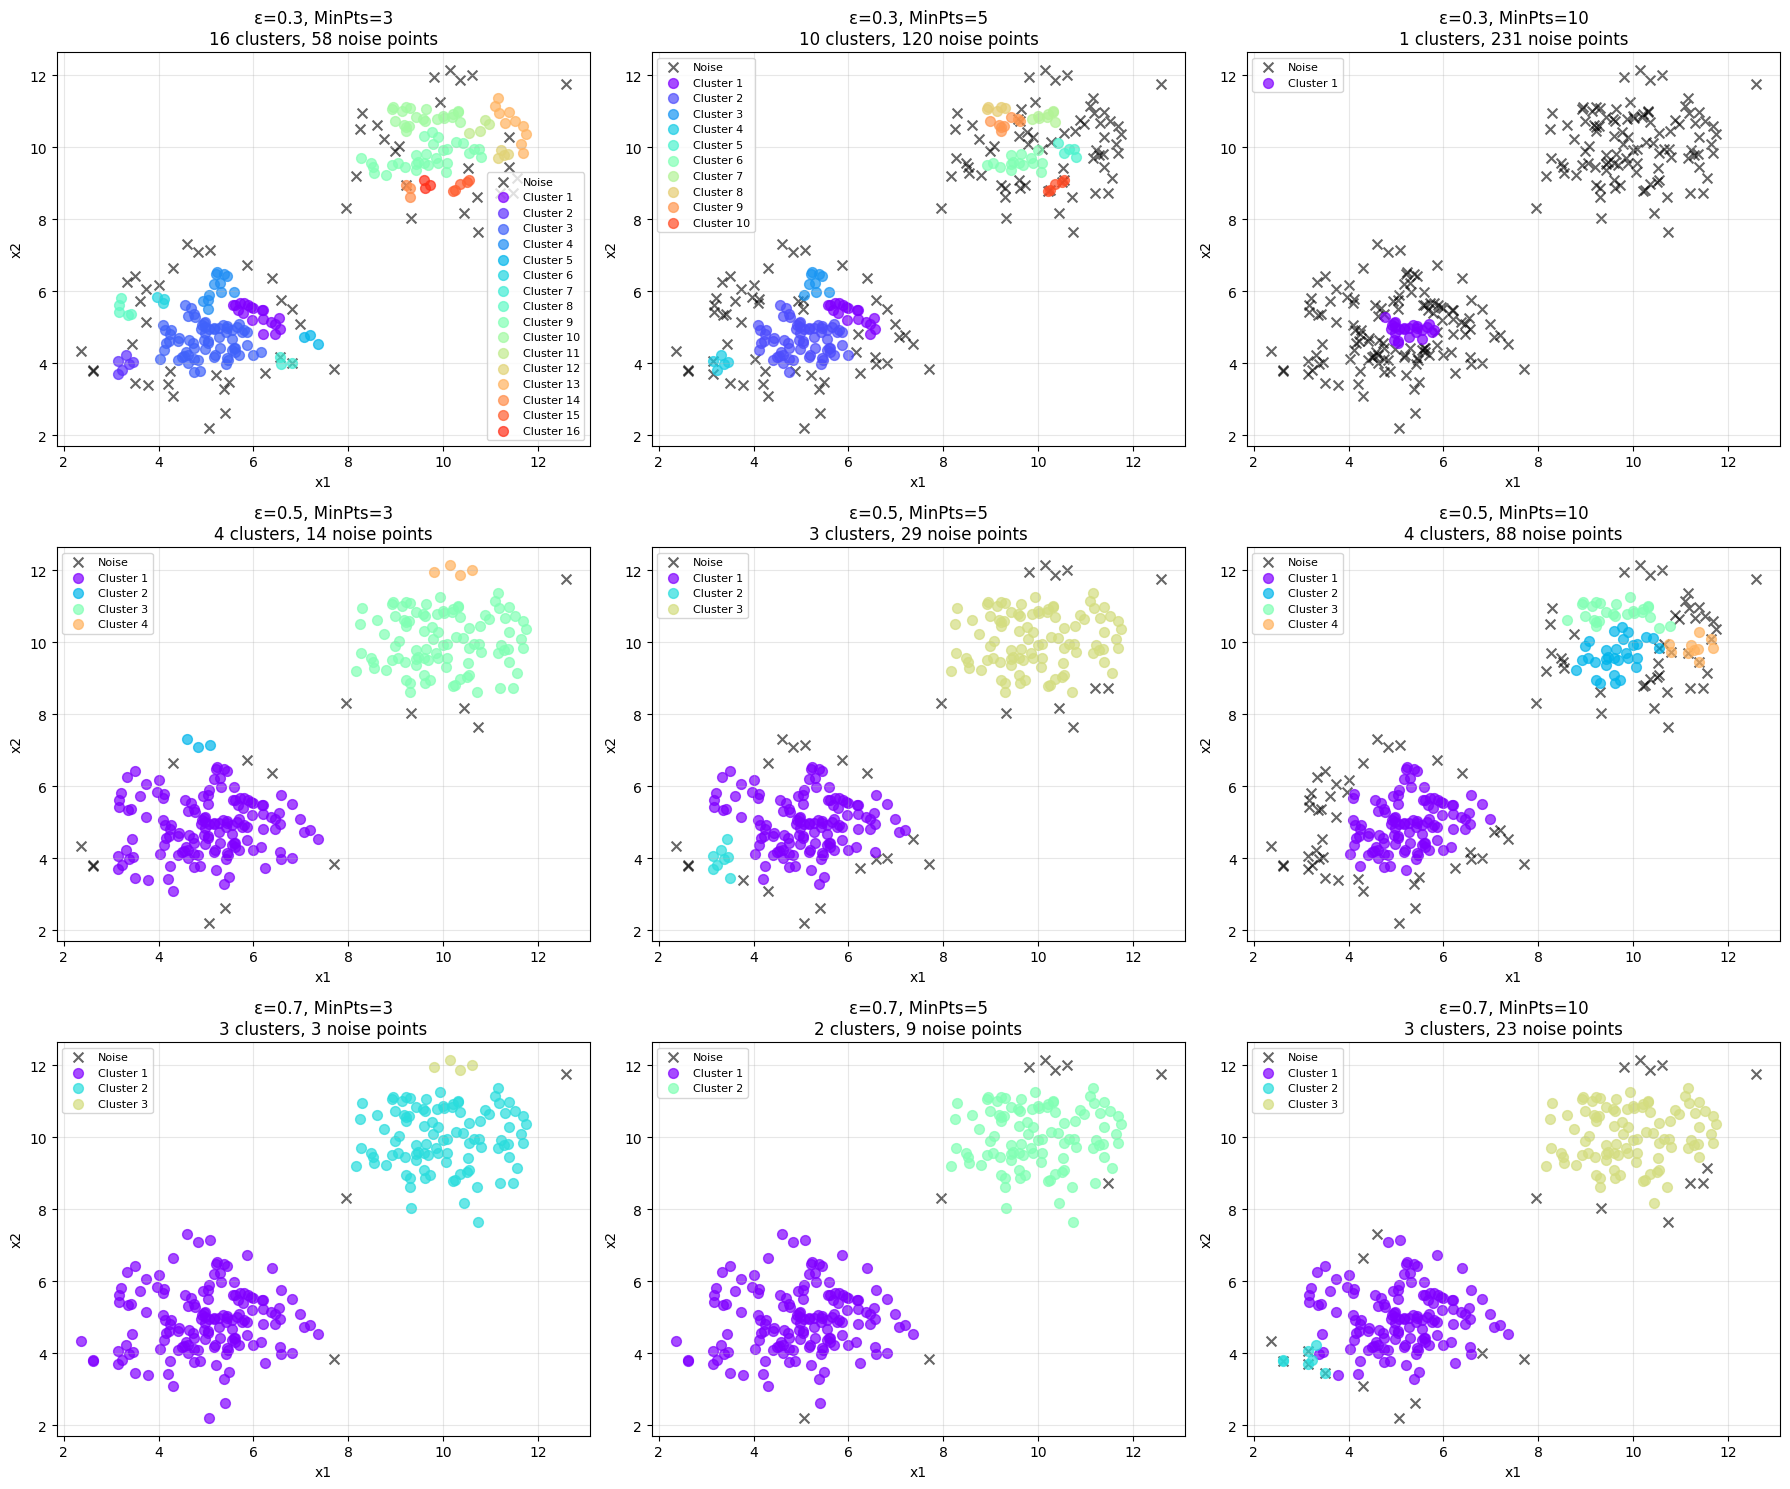

In [71]:
# Hiển thị kết quả cho các tham số khác nhau
def plot_dbscan_results(X, results, n_rows=3, n_cols=3):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 15))
    axes = axes.ravel()
    
    for i, result in enumerate(results):
        idx = result['idx']
        noise = result['noise']
        eps = result['epsilon']
        minpts = result['minpts']
        n_clusters = result['n_clusters']
        
        # Tạo màu cho các cụm
        colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters + 1))
        
        # Vẽ các điểm nhiễu
        noise_points = X[noise]
        if len(noise_points) > 0:
            axes[i].scatter(noise_points[:, 0], noise_points[:, 1], 
                          c='black', marker='x', s=50, label='Noise', alpha=0.6)
        
        # Vẽ các cụm
        for cluster_id in range(1, n_clusters + 1):
            cluster_points = X[idx == cluster_id]
            axes[i].scatter(cluster_points[:, 0], cluster_points[:, 1],
                          c=[colors[cluster_id-1]], s=50, 
                          label=f'Cluster {cluster_id}', alpha=0.7)
        
        axes[i].set_xlabel('x1')
        axes[i].set_ylabel('x2')
        axes[i].set_title(f'ε={eps}, MinPts={minpts}\n{n_clusters} clusters, '
                         f'{result["n_noise"]} noise points')
        axes[i].legend(loc='best', fontsize=8)
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_dbscan_results(X_dbscan, results)

### 2.3. So sánh với sklearn.cluster.DBSCAN

In [72]:
from sklearn.cluster import DBSCAN as DBSCAN_sklearn

# Chọn tham số tốt nhất từ thử nghiệm
best_epsilon = 0.5
best_minpts = 5

print(f"So sánh kết quả với sklearn.cluster.DBSCAN")
print(f"Tham số: epsilon={best_epsilon}, minpts={best_minpts}\n")

# Thuật toán tự xây dựng
dbscan_custom = DBSCAN(X_dbscan, epsilon=best_epsilon, minpts=best_minpts)
idx_custom, noise_custom = dbscan_custom.run()

# Sklearn
dbscan_sklearn = DBSCAN_sklearn(eps=best_epsilon, min_samples=best_minpts)
labels_sklearn = dbscan_sklearn.fit_predict(X_dbscan)

# Thống kê
n_clusters_custom = len(np.unique(idx_custom[idx_custom > 0]))
n_noise_custom = np.sum(noise_custom)

n_clusters_sklearn = len(set(labels_sklearn)) - (1 if -1 in labels_sklearn else 0)
n_noise_sklearn = list(labels_sklearn).count(-1)

print("Thuật toán tự xây dựng:")
print(f"  - Số cụm: {n_clusters_custom}")
print(f"  - Số điểm nhiễu: {n_noise_custom}\n")

print("Sklearn DBSCAN:")
print(f"  - Số cụm: {n_clusters_sklearn}")
print(f"  - Số điểm nhiễu: {n_noise_sklearn}")

So sánh kết quả với sklearn.cluster.DBSCAN
Tham số: epsilon=0.5, minpts=5

Thuật toán tự xây dựng:
  - Số cụm: 3
  - Số điểm nhiễu: 29

Sklearn DBSCAN:
  - Số cụm: 3
  - Số điểm nhiễu: 29


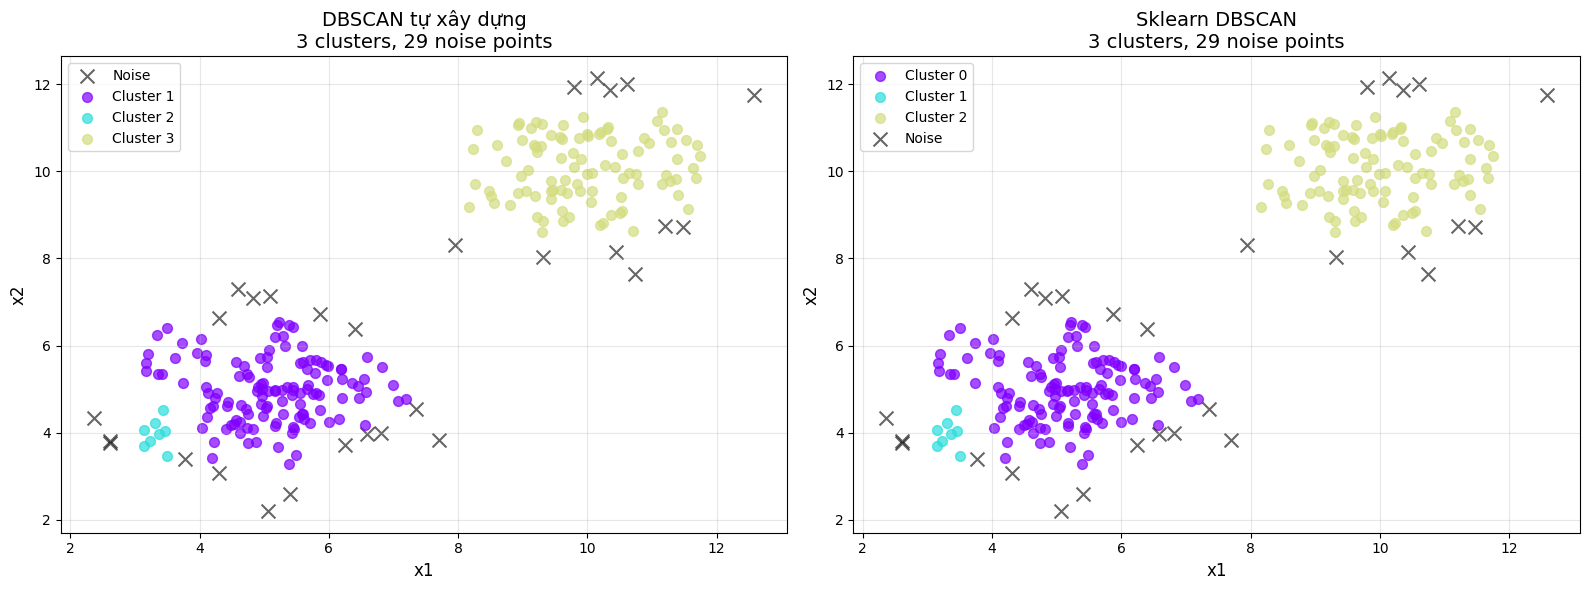

In [73]:
# Hiển thị so sánh trực quan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Thuật toán tự xây dựng
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters_custom + 1))

noise_points = X_dbscan[noise_custom]
if len(noise_points) > 0:
    axes[0].scatter(noise_points[:, 0], noise_points[:, 1], 
                   c='black', marker='x', s=100, label='Noise', alpha=0.6)

for cluster_id in range(1, n_clusters_custom + 1):
    cluster_points = X_dbscan[idx_custom == cluster_id]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1],
                   c=[colors[cluster_id-1]], s=50, 
                   label=f'Cluster {cluster_id}', alpha=0.7)

axes[0].set_xlabel('x1', fontsize=12)
axes[0].set_ylabel('x2', fontsize=12)
axes[0].set_title(f'DBSCAN tự xây dựng\n{n_clusters_custom} clusters, {n_noise_custom} noise points', 
                 fontsize=14)
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Sklearn
unique_labels = set(labels_sklearn)
colors_sklearn = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors_sklearn):
    if k == -1:
        # Noise
        col = 'black'
        marker = 'x'
        label = 'Noise'
        size = 100
    else:
        marker = 'o'
        label = f'Cluster {k}'
        size = 50
    
    class_member_mask = (labels_sklearn == k)
    xy = X_dbscan[class_member_mask]
    axes[1].scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, 
                   s=size, label=label, alpha=0.7 if k != -1 else 0.6)

axes[1].set_xlabel('x1', fontsize=12)
axes[1].set_ylabel('x2', fontsize=12)
axes[1].set_title(f'Sklearn DBSCAN\n{n_clusters_sklearn} clusters, {n_noise_sklearn} noise points', 
                 fontsize=14)
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 2.4. Phân tích ảnh hưởng của tham số epsilon và minpts

In [74]:
# Phân tích ảnh hưởng của tham số
print("=" * 80)
print("PHÂN TÍCH ẢNH HƯỞNG CỦA THAM SỐ")
print("=" * 80)

print("\n1. Ảnh hưởng của Epsilon (ε):")
print("   - Epsilon nhỏ → Ít điểm được coi là lân cận → Nhiều cụm nhỏ hoặc nhiều noise")
print("   - Epsilon lớn → Nhiều điểm được coi là lân cận → Ít cụm lớn hoặc tất cả thành 1 cụm")
print("   - Cần chọn epsilon phù hợp với mật độ dữ liệu")

print("\n2. Ảnh hưởng của MinPts:")
print("   - MinPts nhỏ → Dễ tạo cụm → Ít noise nhưng có thể nhạy với nhiễu")
print("   - MinPts lớn → Khó tạo cụm → Nhiều noise nhưng cụm chắc chắn hơn")
print("   - Thường chọn MinPts >= số chiều dữ liệu + 1")

print("\n3. Kết quả từ thử nghiệm trên dữ liệu:")
# Tạo bảng tóm tắt
import pandas as pd
summary_df = pd.DataFrame(results)
summary_df = summary_df[['epsilon', 'minpts', 'n_clusters', 'n_noise']]
summary_df['noise_percent'] = (summary_df['n_noise'] / len(X_dbscan) * 100).round(2)
print("\n", summary_df.to_string(index=False))

# Tìm tham số tốt nhất (cân bằng giữa số cụm và noise)
print("\n4. Khuyến nghị:")
print(f"   - Tham số tốt nhất: ε={best_epsilon}, MinPts={best_minpts}")
print(f"   - Số cụm: {n_clusters_custom}")
print(f"   - Tỷ lệ noise: {n_noise_custom/len(X_dbscan)*100:.2f}%")
print("   - Lý do: Cân bằng tốt giữa số cụm và khả năng phát hiện noise")

PHÂN TÍCH ẢNH HƯỞNG CỦA THAM SỐ

1. Ảnh hưởng của Epsilon (ε):
   - Epsilon nhỏ → Ít điểm được coi là lân cận → Nhiều cụm nhỏ hoặc nhiều noise
   - Epsilon lớn → Nhiều điểm được coi là lân cận → Ít cụm lớn hoặc tất cả thành 1 cụm
   - Cần chọn epsilon phù hợp với mật độ dữ liệu

2. Ảnh hưởng của MinPts:
   - MinPts nhỏ → Dễ tạo cụm → Ít noise nhưng có thể nhạy với nhiễu
   - MinPts lớn → Khó tạo cụm → Nhiều noise nhưng cụm chắc chắn hơn
   - Thường chọn MinPts >= số chiều dữ liệu + 1

3. Kết quả từ thử nghiệm trên dữ liệu:

  epsilon  minpts  n_clusters  n_noise  noise_percent
     0.3       3          16       58          22.66
     0.3       5          10      120          46.88
     0.3      10           1      231          90.23
     0.5       3           4       14           5.47
     0.5       5           3       29          11.33
     0.5      10           4       88          34.38
     0.7       3           3        3           1.17
     0.7       5           2        9        

### 2.5. So sánh K-Means và DBSCAN trên cùng dữ liệu input.csv

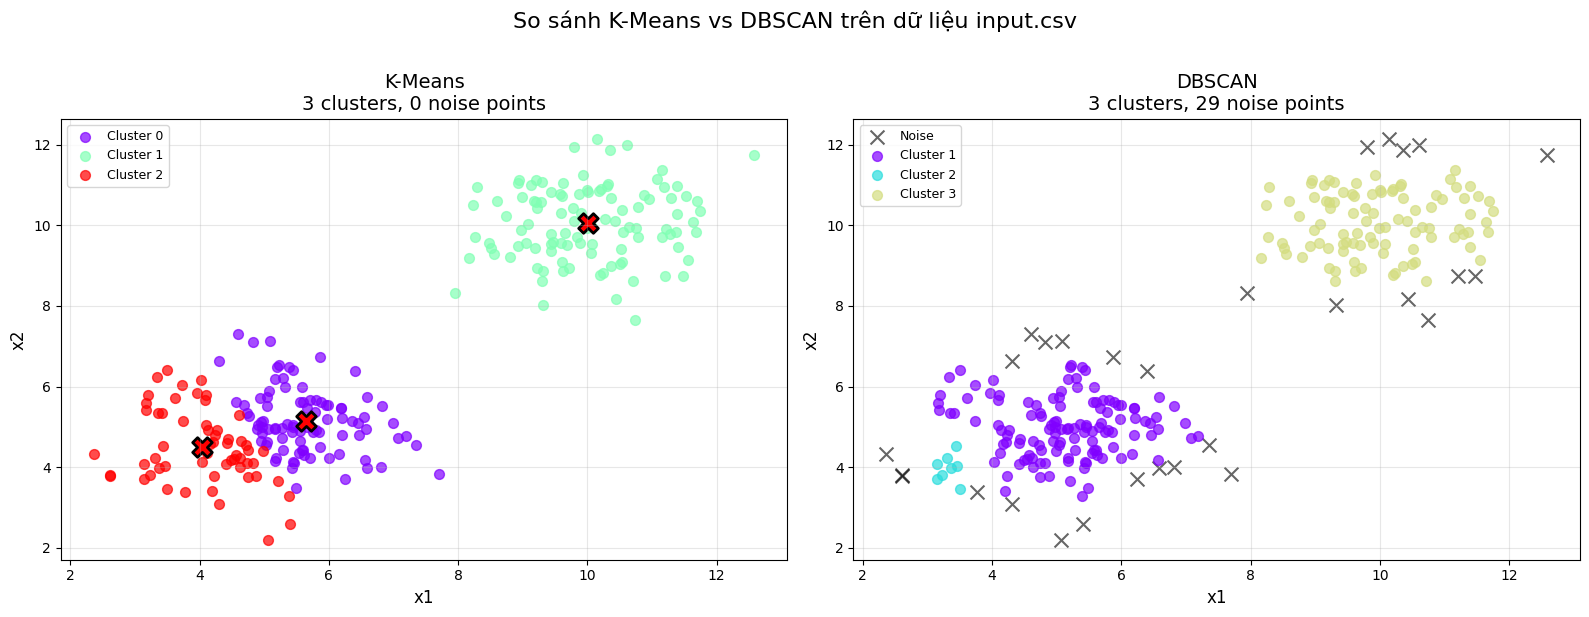


Nhận xét so sánh:
K-Means:
  - Số cụm: 3 (đã định trước)
  - Tất cả điểm đều được gán vào cụm
  - Cụm có hình dạng tròn, phân bố đều quanh centroid
  - Không phát hiện được outliers

DBSCAN:
  - Số cụm: 3 (tự động phát hiện)
  - Phát hiện 29 điểm nhiễu (11.33%)
  - Cụm có thể có hình dạng bất kỳ
  - Phù hợp hơn khi dữ liệu có outliers

Kết luận:
  - Trên dữ liệu này, cả hai thuật toán đều tìm được số cụm tương tự
  - DBSCAN có ưu thế trong việc phát hiện điểm nhiễu
  - K-Means phân cụm nhanh hơn nhưng ép tất cả điểm vào cụm


In [75]:
# Áp dụng K-Means lên cùng dữ liệu để so sánh
# Dùng số cụm = số cụm tìm được bởi DBSCAN
kmeans_input = KMeans(n_clusters=n_clusters_custom, random_state=42)
kmeans_labels = kmeans_input.fit_predict(X_dbscan)

# Hiển thị so sánh
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-Means
colors_kmeans = plt.cm.rainbow(np.linspace(0, 1, n_clusters_custom))
for k in range(n_clusters_custom):
    cluster_points = X_dbscan[kmeans_labels == k]
    axes[0].scatter(cluster_points[:, 0], cluster_points[:, 1],
                   c=[colors_kmeans[k]], s=50, 
                   label=f'Cluster {k}', alpha=0.7)
    # Vẽ centroid
    center = kmeans_input.cluster_centers_[k]
    axes[0].scatter(center[0], center[1], c='red', marker='X', 
                   s=200, edgecolors='black', linewidths=2)

axes[0].set_xlabel('x1', fontsize=12)
axes[0].set_ylabel('x2', fontsize=12)
axes[0].set_title(f'K-Means\n{n_clusters_custom} clusters, 0 noise points', fontsize=14)
axes[0].legend(loc='best', fontsize=9)
axes[0].grid(True, alpha=0.3)

# DBSCAN (sử dụng kết quả đã tính)
noise_points = X_dbscan[noise_custom]
if len(noise_points) > 0:
    axes[1].scatter(noise_points[:, 0], noise_points[:, 1], 
                   c='black', marker='x', s=100, label='Noise', alpha=0.6)

for cluster_id in range(1, n_clusters_custom + 1):
    cluster_points = X_dbscan[idx_custom == cluster_id]
    axes[1].scatter(cluster_points[:, 0], cluster_points[:, 1],
                   c=[colors[cluster_id-1]], s=50, 
                   label=f'Cluster {cluster_id}', alpha=0.7)

axes[1].set_xlabel('x1', fontsize=12)
axes[1].set_ylabel('x2', fontsize=12)
axes[1].set_title(f'DBSCAN\n{n_clusters_custom} clusters, {n_noise_custom} noise points', fontsize=14)
axes[1].legend(loc='best', fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.suptitle('So sánh K-Means vs DBSCAN trên dữ liệu input.csv', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("\nNhận xét so sánh:")
print("=" * 80)
print("K-Means:")
print(f"  - Số cụm: {n_clusters_custom} (đã định trước)")
print(f"  - Tất cả điểm đều được gán vào cụm")
print(f"  - Cụm có hình dạng tròn, phân bố đều quanh centroid")
print(f"  - Không phát hiện được outliers")
print("\nDBSCAN:")
print(f"  - Số cụm: {n_clusters_custom} (tự động phát hiện)")
print(f"  - Phát hiện {n_noise_custom} điểm nhiễu ({n_noise_custom/len(X_dbscan)*100:.2f}%)")
print(f"  - Cụm có thể có hình dạng bất kỳ")
print(f"  - Phù hợp hơn khi dữ liệu có outliers")
print("\nKết luận:")
print("  - Trên dữ liệu này, cả hai thuật toán đều tìm được số cụm tương tự")
print("  - DBSCAN có ưu thế trong việc phát hiện điểm nhiễu")
print("  - K-Means phân cụm nhanh hơn nhưng ép tất cả điểm vào cụm")

## KẾT LUẬN

### K-Means Clustering:
- ✅ Đã xây dựng thành công thuật toán K-means từ numpy
- ✅ So sánh kết quả với sklearn cho thấy sự tương đồng cao
- ✅ Áp dụng cho bộ dữ liệu MNIST:
  - Phân cụm 5000 mẫu thành 10 cụm
  - Phân tích chi tiết tỷ lệ phân cụm đúng/sai cho từng chữ số
  - Hiển thị tâm cụm và các mẫu đại diện
- ✅ K-means phù hợp với dữ liệu có cụm hình cầu, phân bố đều

**Ưu điểm:**
- Đơn giản, dễ hiểu và triển khai
- Tốc độ nhanh, phù hợp với dữ liệu lớn
- Kết quả ổn định khi dữ liệu tốt

**Nhược điểm:**
- Cần biết trước số cụm K
- Nhạy cảm với điểm khởi tạo và outliers
- Chỉ hoạt động tốt với cụm hình cầu

### DBSCAN:
- ✅ Xây dựng thành công thuật toán DBSCAN từ numpy
- ✅ Thử nghiệm với 9 bộ tham số khác nhau (ε × MinPts)
- ✅ Phân tích chi tiết ảnh hưởng của tham số:
  - Epsilon (ε): Quyết định bán kính lân cận
  - MinPts: Quyết định mật độ tối thiểu
- ✅ So sánh với sklearn.cluster.DBSCAN cho kết quả tương đồng
- ✅ DBSCAN phù hợp với dữ liệu có mật độ không đều và cụm hình dạng phức tạp

**Ưu điểm:**
- Không cần biết trước số cụm
- Phát hiện được cụm hình dạng bất kỳ
- Có khả năng phát hiện noise/outliers
- Không bị ảnh hưởng bởi outliers

**Nhược điểm:**
- Nhạy cảm với tham số ε và MinPts
- Khó xác định tham số phù hợp
- Không hiệu quả với dữ liệu có mật độ rất khác nhau
- Độ phức tạp tính toán cao hơn K-means

### So sánh K-Means và DBSCAN:

| Tiêu chí | K-Means | DBSCAN |
|----------|---------|---------|
| Số cụm | Cần biết trước | Tự động xác định |
| Hình dạng cụm | Hình cầu | Bất kỳ |
| Xử lý outliers | Nhạy cảm | Phát hiện được |
| Tốc độ | Nhanh (O(nKd)) | Chậm hơn (O(n²)) |
| Tham số | K | ε, MinPts |
| Kết quả | Tất cả điểm được gán nhãn | Có thể có noise |
| Phù hợp | Dữ liệu phân bố đều | Dữ liệu phức tạp |

### Bài học rút ra:

1. **Khi nào dùng K-Means:**
   - Biết trước số cụm
   - Dữ liệu có phân bố đều
   - Cần tốc độ xử lý cao
   - Cụm có hình dạng tròn/cầu

2. **Khi nào dùng DBSCAN:**
   - Không biết số cụm
   - Dữ liệu có nhiễu
   - Cụm có hình dạng phức tạp
   - Cần phát hiện outliers

3. **Kinh nghiệm thực hành:**
   - K-Means: Chạy nhiều lần với khởi tạo khác nhau, sử dụng Elbow method
   - DBSCAN: Thử nghiệm nhiều tham số, sử dụng k-distance graph
   - Luôn chuẩn hóa dữ liệu trước khi phân cụm
   - Kết hợp nhiều phương pháp để có kết quả tốt nhất

---

**Hoàn thành bài thực hành tuần 10 - Bùi Quang Chiến**